# Graphs

In [3]:
from typing_extensions import TypedDict

class State(TypedDict):
    """Agent状态定义"""
    foo: str = "test_foo"
    bar: list[str] = ["test_bar"]

多结构 schemas

In [4]:
from langgraph.graph import StateGraph, START, END

class InputState(TypedDict):
    """Agent输入状态定义"""
    user_input: str

class OutputState(TypedDict):
    """Agent输出状态定义"""
    graph_output: str
    
class OverallState(TypedDict):
    """"""
    foo: str
    user_input: str
    graph_output: str
    
class PrivateState(TypedDict):
    bar: str
    
def node_1(state: InputState) -> OverallState:
    return {"foo": state["user_input"] + " name"}

def node_2(state: OutputState) -> PrivateState:
    return {"bar": state["foo"] + " is"}

def node_3(state: PrivateState) -> OutputState:
    return {"graph_output": state["bar"] + " Lance"}

builder = StateGraph(OverallState, input_shema=InputState, output_schema=OutputState)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)

builder.add_edge(START, "node_1")
builder.add_edge("node_1", "node_2")
builder.add_edge("node_2", "node_3")
builder.add_edge("node_3", END)
graph = builder.compile()

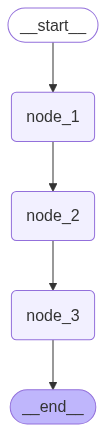

In [5]:
# 输出图
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

# png_data = graph.get_graph().draw_mermaid_png()
# with open("graph.png", "wb") as f:
#     f.write(png_data)

# State

State创建示例

In [6]:
# example 1
from typing_extensions import TypedDict

class State(TypedDict):
    foo: str
    bar: list[str]

state = State(foo="test_foo", bar=["test_bar"])
print(f"bar type: {type(state["bar"])}\n state: {state}")

bar type: <class 'list'>
 state: {'foo': 'test_foo', 'bar': ['test_bar']}


In [7]:
# example 2
from typing import Annotated
from typing_extensions import TypedDict
# or
# from typing import TypedDict
from operator import add

class State(TypedDict):
    foo: str
    bar: Annotated[list[str], add]

state = State(foo="test_foo", bar=["test_bar"])
print(f"bar type: {type(state["bar"])}\n state: {state}")


bar type: <class 'list'>
 state: {'foo': 'test_foo', 'bar': ['test_bar']}


In [10]:
# 更改数据
state["foo"] = "mod_foo"
state["bar"] = ["mod_bar"]
state["bar"].append("add_bar")
print(state)

{'foo': 'mod_foo', 'bar': ['mod_bar', 'add_bar']}


In [9]:
# 非 State 状态定义
class test_state():
    def __init__(self, foo: str, bar: list[str]) -> None:
        self.foo = foo
        self.bar = bar

ts = test_state(foo="test_foo", bar=["test_bar"])
print(f"bar type: {type(ts.bar)}\n state: {ts.__dict__}")

# 若更改数据
ts.foo = "mod_foo"
ts.bar.append("mod_bar")
print(f"{ts.foo}\n{ts.bar}")

bar type: <class 'list'>
 state: {'foo': 'test_foo', 'bar': ['test_bar']}
mod_foo
['test_bar', 'mod_bar']


注意到和 TypedDict 定义的区别了吗？
1. 数据引用，TypedDict 采用 `[""]` 方式访问，类采用 `.` 方式访问
2. `.` 类访问方式更改 `str` 不起作用

## Working with Messages in Graph State

### 在 Graph 中使用 Messages
如果没有指定 reducer 会将消息列表覆盖掉，如果只想将新消息添加到 messages 列表中，可以使用 `operator.add`

In [ ]:
# 
messages: Annotated[list[str], add]

from langchain_core.messages import HumanMessage
# 官方支持
{"messages": [HumanMessage(content="message")]}
# 同时也支持
{"messages": [{"type": "human", "content": "message"}]}

# 两种形式都很常见

{'messages': [{'type': 'human', 'content': 'message'}]}

In [15]:
# 添加消息方法
from langchain_core.messages import AnyMessage
from langgraph.graph.message import add_messages
from typing import Annotated, TypedDict

# 方法一
class GraphState(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

# 方法二
class GraphStateOther(TypedDict):
    messages: list[AnyMessage]


选择哪种方式？ 如果从程序可读性连说，建议选择方法一，直白、明了

### Message State

In [ ]:
from langgraph.graph import MessagesState
# from operator import add

class State(MessagesState):
    documents: list[str]
    # documents: Annotated[list[str], add]

# Node
`node` 接受以下参数：
1. `state`
2. `config`：`RunnableConfig`
3. `runtime`：`Runtime` - 运行时的上下文和其它信息，如 store 和 stream_writer

In [ ]:
from dataclasses import dataclass
from typing_extensions import TypedDict

from langchain_core.runnables import RunnableConfig
from langgraph.graph import StateGraph
from langgraph.runtime import Runtime

class State(TypedDict):
    input: str
    results: str
    
@dataclass
class Context:
    user_id: str

def plain_node(state: State) -> State:
    return state

def node_with_runtime(state: State, runtime: Runtime) -> dict[State, Runtime]:
    print(f"In node: {runtime.context.user_id}")
    return {"state": state, "user_id": runtime.context.user_id}

def node_with_config(state: State, config: RunnableConfig) -> dict[str]:
    print(f"In node with thread_id: {config["configurable"]["thread_id"]}")
    return {"results": f"Hello, {state['input']}"}

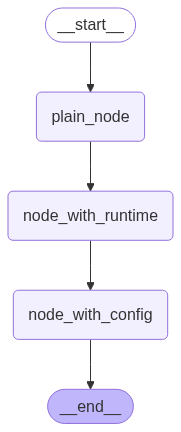

In [ ]:
builder: StateGraph = StateGraph(State)
builder.add_node("plain_node", plain_node)
builder.add_node("node_with_runtime", node_with_runtime)
builder.add_node("node_with_config", node_with_config)

# 知道创建一个完整的Agent Graph还需要添加什么吗？
"""
在下方写出你的 Code
"""


In [ ]:
"""
如果实在想不到，在下方填空
"""
from langgraph.graph import ____, ____
builder.add_edge(START, "_______")
builder.add_edge("_______", "_______")
builder.add_edge("_______", "_______")
builder.add_edge("_______", END)

# 创建图
from IPython.display import Image, display
display(Image(builder.compile().get_graph().draw_mermaid_png()))

## `START` Node

In [ ]:
from langgraph.graph import START

graph.add_edge(START, "node_a")

## `END` Node

In [ ]:
from langgraph.graph import END

graph.add_edge("node_a", END)

## Node 缓存
- `compile` 图时 或 指定入口节点 指定缓存
- 指定节点的缓存策略
- `ttl` 为缓存的生存时间（以秒为单位）。如果未指定，则缓存永不过期。

In [21]:
import time

from typing_extensions import TypedDict
from langgraph.graph import StateGraph
from langgraph.cache.memory import InMemoryCache
from langgraph.types import CachePolicy

class State(TypedDict):
    x: int
    result: int
    
builder = StateGraph(State)

def expensive_node(state: State) -> dict[str, int]:
    time.sleep(2)
    return {"result": state["x"] * 2}

builder.add_node("expensive_node", expensive_node, cache_policy=CachePolicy(ttl=3))
builder.set_entry_point("expensive_node")
builder.set_finish_point("expensive_node")

graph = builder.compile(cache=InMemoryCache())

print(graph.invoke({"x": 5}, stream_mode="updates"))
print(graph.invoke({"x": 5}, stream_mode="updates"))


[{'expensive_node': {'result': 10}}]
[{'expensive_node': {'result': 10}, '__metadata__': {'cached': True}}]
